In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('bank-full.csv', sep=';')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column != 'y':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [6]:
target_encoder = LabelEncoder()
df['y'] = target_encoder.fit_transform(df['y'])  # 'yes' = 1, 'no' = 0

In [7]:
X = df.drop('y', axis=1)
y = df['y']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [10]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=target_encoder.classes_))

Accuracy: 0.8966051089240297

Classification Report:
               precision    recall  f1-score   support

          no       0.92      0.97      0.94      7952
         yes       0.62      0.37      0.46      1091

    accuracy                           0.90      9043
   macro avg       0.77      0.67      0.70      9043
weighted avg       0.88      0.90      0.88      9043



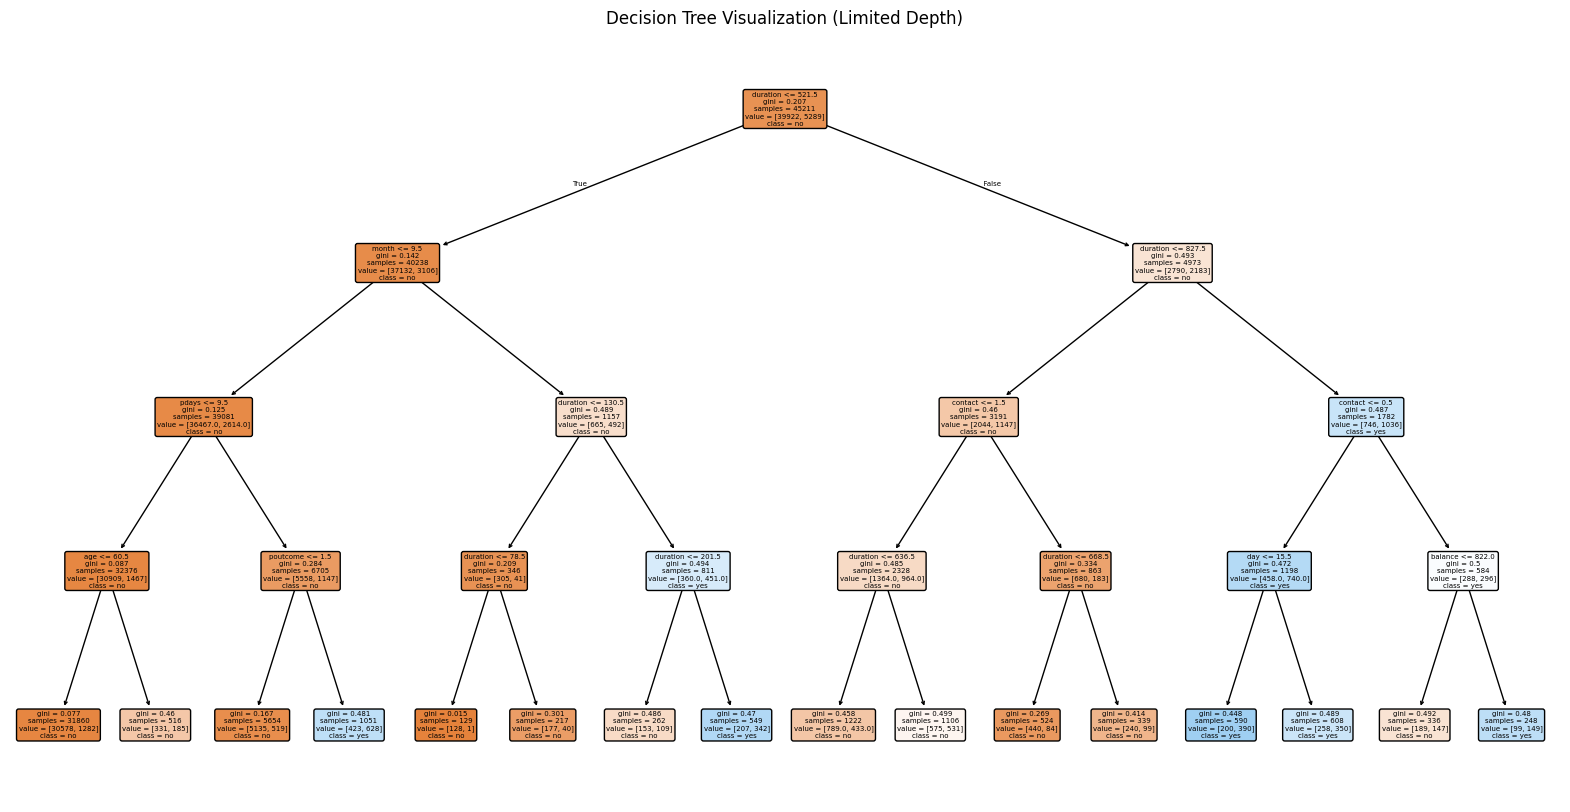

In [11]:
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=target_encoder.classes_, filled=True, rounded=True)
plt.title("Decision Tree Visualization (Limited Depth)")
plt.show()